# Price Recommendation for Online Sellers

In the ever-evolving landscape of e-commerce, pricing plays a pivotal role in the success of online sellers. Finding the optimal price point for products is a delicate balancing act, impacting a seller's ability to maximize sales, revenue, and profitability while staying competitive in a dynamic market. The art and science of setting prices in the digital marketplace have given rise to a transformative solution: Price Recommendation Systems, which is a solution that combines machine learning techniques and predictive analytics to help online sellers make informed pricing decisions.

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Importing the dataset

In [2]:
df = pd.read_csv("data_ecommerce.csv", encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Preprocessing

In [4]:
df.shape

(541909, 8)

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate       UnitPrice  CustomerID  Country       
555524     22698      PINK REGENCY TEACUP AND SAUCER        1        6/5/2011 11:37    2.95       16923.0     United Kingdom    20
           22697      GREEN REGENCY TEACUP AND SAUCER       1        6/5/2011 11:37    2.95       16923.0     United Kingdom    12
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN   12       10/26/2011 12:46  1.25       14102.0     United Kingdom     8
572344     M          Manual                                48       10/24/2011 10:43  1.50       14607.0     United Kingdom     6
578289     23395      BELLE JARDINIERE CUSHION COVER        1        11/23/2011 14:07  3.75       17841.0     United Kingdom     6
                                                                                                                                ..
553915     21174      POTTERING IN THE SHED METAL SIGN      12       5/19/2011 19:51   2.

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
df.drop(['CustomerID'],axis =1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [11]:
#Formatting Dates to a more suitable format
df['Date'] = pd.to_datetime(df['InvoiceDate'])
df['Month-Year'] = df['Date'].dt.strftime('%b-%Y')
df.drop(['InvoiceDate','Date'],axis=1,inplace=True)

df.reset_index(drop=True, inplace=True)

df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Month-Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,Dec-2010


## Exploratory Data Analysis

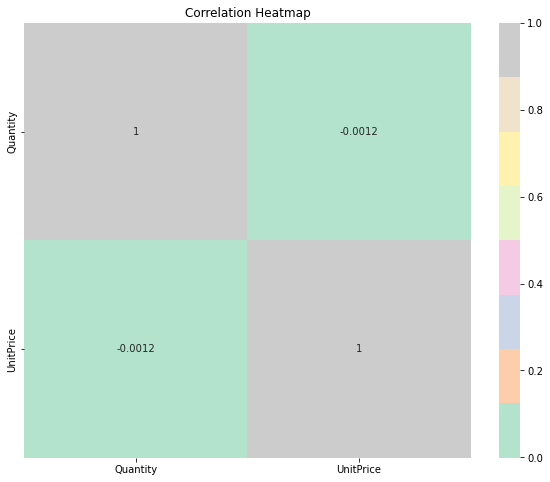

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel2')
plt.title('Correlation Heatmap')
plt.show()

### <font color= Green>  Feature Engineering 

In [13]:
df_10 = df.nlargest(10, 'Quantity')
df_10

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Month-Year
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,United Kingdom,Dec-2011
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,United Kingdom,Jan-2011
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,0.00,United Kingdom,Nov-2011
74614,542504,37413,NaN,5568,0.00,United Kingdom,Jan-2011
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,0.21,United Kingdom,Oct-2011
206121,554868,22197,SMALL POPCORN HOLDER,4300,0.72,United Kingdom,May-2011
220843,556231,85123A,?,4000,0.00,United Kingdom,Jun-2011
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,0.82,United Kingdom,Feb-2011
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,0.06,United Kingdom,Jul-2011
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,United Kingdom,Jan-2011


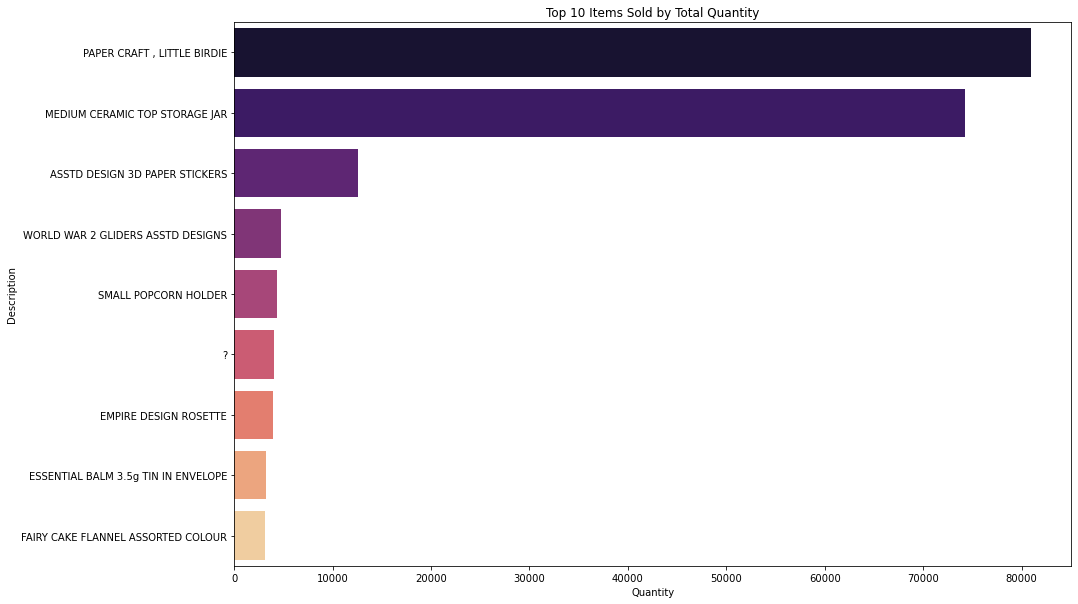

In [14]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_10, x="Quantity", y="Description", capsize=3, palette="magma")
plt.title("Top 10 Items Sold by Total Quantity")
plt.xlabel("Quantity")
plt.ylabel("Description")
plt.show()

In [15]:
## Calculating total price (i.e. creating a new feature)
df['Total Price'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Month-Year,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,Dec-2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,Dec-2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,Dec-2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,Dec-2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,Dec-2010,20.34


<AxesSubplot:>

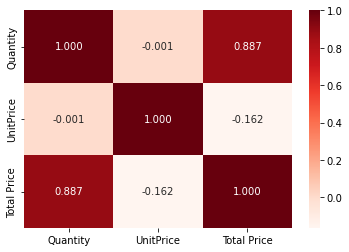

In [16]:
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt=".3f")

In [17]:
#Encoding non numerical data to make it compatible with the ML algorithms
label_en = LabelEncoder()
df['StockCode_Encoded'] = label_en.fit_transform(df['StockCode'])
df['Invoice_Encoded'] = label_en.fit_transform(df['InvoiceNo'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Month-Year,Total Price,StockCode_Encoded,Invoice_Encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,Dec-2010,15.30,3536,0
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,Dec-2010,20.34,2794,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,Dec-2010,22.00,3044,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,Dec-2010,20.34,2985,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,Dec-2010,20.34,2984,0


## Implementing Regression Models

In [18]:
X = df.drop(columns=['InvoiceNo','StockCode','Total Price','Month-Year','Description','Country'])
y = df['Total Price']

In [19]:
X.dtypes

Quantity               int64
UnitPrice            float64
StockCode_Encoded      int64
Invoice_Encoded        int64
dtype: object

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###  Linear Regression
 Linear regression is a simple and interpretable model that works well when there is a linear relationship between the predictors and the target variable. It's suitable for basic price predictions.

In [22]:
models = LinearRegression()
models.fit(X_train, y_train)
y_pred = models.predict(X_test)
print(f"Predicted y: \n {y_pred}.")

print(f" R2 Score: {r2_score(y_test,y_pred)}")

Predicted y: 
 [48.11145549  3.0054828   8.02224374 ... 20.04112157 42.60195374
  6.83440988].
 R2 Score: 0.8463462940806754


The R-squared (R2) score, also known as the coefficient of determination, is a statistical metric used to evaluate the goodness of fit of a regression model. <br> The R2 score has values between 0 and 1:<br>
R2 = 0: The model does not explain any of the variance in the dependent variable, indicating a poor fit.<br>
R2 = 1: The model perfectly explains all of the variance in the dependent variable, indicating an excellent fit.

### Ridge

Ridge regression, often referred to as L2 regularization, is a linear regression technique used in machine learning to prevent overfitting and improve the generalization of a linear regression model. It does this by adding a penalty term to the linear regression loss function, which encourages the regression coefficients to be small and reduces the complexity of the model.

In [23]:
model3 = Ridge(alpha = 10)
model3.fit(X_train, y_train)
y_pred1 = model3.predict(X_test)
print(f"Predicted y: \n {y_pred1}.")

print(f" R2 Score: {r2_score(y_test,y_pred1)}")

Predicted y: 
 [48.11069033  3.00594228  8.02260034 ... 20.04104566 42.60132628
  6.83468639].
 R2 Score: 0.8463453877941648


### Lasso

Lasso, short for "Least Absolute Shrinkage and Selection Operator," is a linear regression technique that is used for feature selection and regularization. It helps prevent overfitting and can be particularly useful when you have a large number of features in your dataset.
Lasso works by adding a penalty term to the linear regression loss function, which encourages some of the regression coefficients (also known as model parameters) to be exactly equal to zero. This results in feature selection, meaning that some of the features will have coefficients of zero, effectively removing them from the model. The remaining features with non-zero coefficients are considered the most important in making predictions.

#### <font color= Green>  Analysing Lasso

In [24]:
model2 = Lasso(alpha = 10)
model2.fit(X_train, y_train)
y_pred1 = model2.predict(X_test)
print(f"Predicted y: \n {y_pred1}.")

print(f" R2 Score: {r2_score(y_test,y_pred1)}")

Predicted y: 
 [41.6239306   8.53344051 12.73462479 ... 17.87230549 42.06405467
  8.55460548].
 R2 Score: 0.8463055568729967


In [25]:
r2_lasso=[]
for x in range(10,500,10):
    model_l = Lasso(alpha = x)
    model_l.fit(X_train, y_train)
    y_pred = model_l.predict(X_test)

    r2_value = r2_score(y_test,y_pred)
    r2_lasso.append(r2_value)

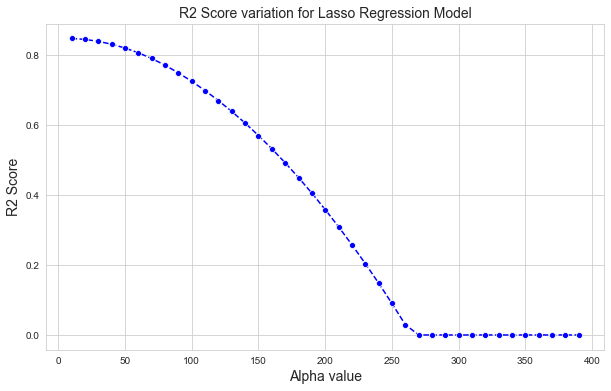

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(range(10,400,10)), y=r2_lasso[:39], marker='o', color='blue', linestyle = 'dashed')
plt.title('R2 Score variation for Lasso Regression Model',fontsize=14)
plt.xlabel('Alpha value',fontsize=14)
plt.ylabel('R2 Score',fontsize=14)
plt.show()

### Random Forest Regression

Random Forest Regression is an ensemble learning technique that combines multiple decision trees to perform regression tasks. It is a powerful and flexible machine learning algorithm that can be used for both simple and complex regression problems.

In [27]:
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(f"Predicted y: \n {y_pred1}.")

print(f" R2 Score: {r2_score(y_test,y_pred1)}")

Predicted y: 
 [20.4  27.8   2.6  ... 13.2   4.56  0.39].
 R2 Score: 0.5305768449349425


#### <font color= Green>  Analysing Random Forest

In [28]:
n_estim = list(range(20,160,10))
random_forest_R = []
for n in n_estim:
    rf_R = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_R.fit(X_train,y_train)
    y_pred_ = rf_R.predict(X_test)

    r2_value = r2_score(y_test,y_pred_)
    random_forest_R.append(r2_value)

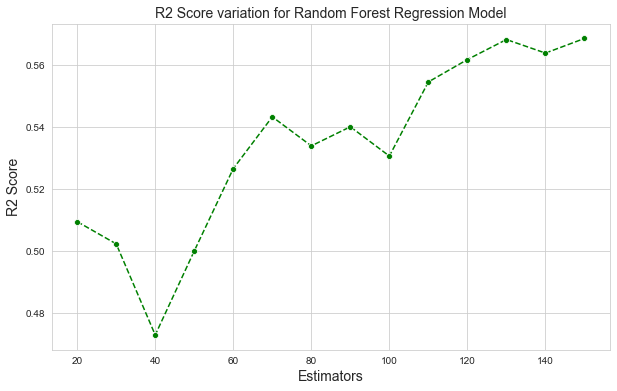

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_estim, y=random_forest_R, marker='o', color='green', linestyle = 'dashed')
plt.title('R2 Score variation for Random Forest Regression Model',fontsize=14)
plt.xlabel('Estimators',fontsize=14)
plt.ylabel('R2 Score',fontsize=14)
plt.show()